## **Vehicle Insurance Analysis🚗:-**

### **Executive Summary:**
This project presents a comprehensive Exploratory Data Analysis (EDA) of vehicle insurance data to identify key factors influencing customer insurance purchase decisions. Through systematic data analysis, visualization, and statistical modeling, we uncover actionable insights that can drive business strategy, improve customer targeting, and optimize premium pricing.

**Key Business Impact:** The analysis reveals critical customer segments and behavioral patterns that can increase conversion rates by targeting high-potential customers while optimizing marketing spend.


### **Project Overview:**

**Business Context**

The vehicle insurance industry faces challenges in customer acquisition and retention. Understanding customer behavior, preferences, and likelihood to purchase insurance is crucial for:

* Targeted marketing campaigns
* Risk assessment and premium pricing
* Product development and customization
* Regional market penetration strategies



### **Dataset Overview:**
Source: Vehicle Insurance Dataset

Size: 354,405 records with 12 features

Time Period: Cross-sectional customer data

Key Features:

* Demographics: Age, Gender, Region
* Vehicle Information: Age, Damage History
* Insurance History: Previously Insured status, Premium amounts
* Customer Relationship: Vintage (relationship duration), Sales Channel
* Target Variable: Response (Interest in purchasing insurance)

The ultimate goal is to derive
meaningful insights that can inform decision-making processes within
the insurance domain.


In [50]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### **Data Loading and Inspection:**
* Understand the structure of the dataset.
* Identify the types of information available.

In [51]:
data= pd.read_csv("/content/Vehicle_Insurance.csv")
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [53]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [54]:
data.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


### **Data Cleaning:-**

In [55]:
#Drop ID column
data.drop(columns=["id"],inplace=True)

In [56]:
# Clean missing data
data.dropna(inplace=True)

In [57]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


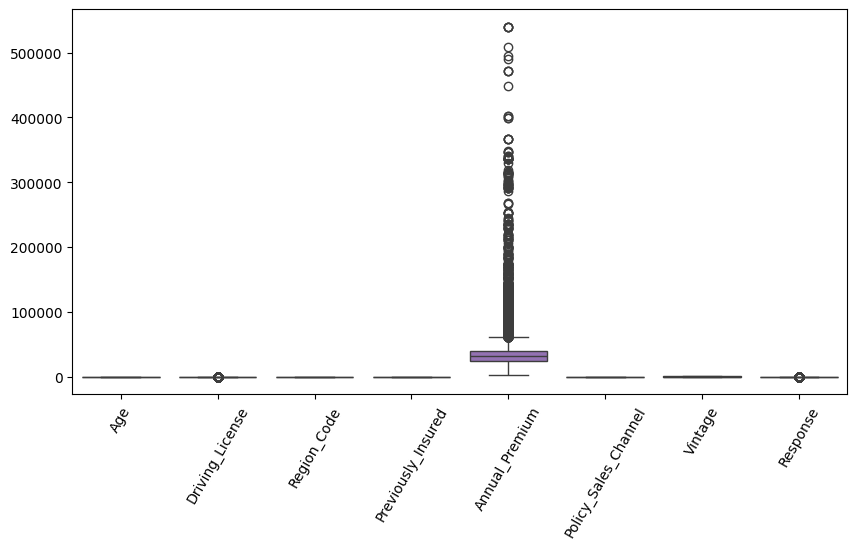

In [58]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=60)
sns.boxplot(data)
plt.show()

OUTLIER DETECTED IN ANNUAL PREMIUM:

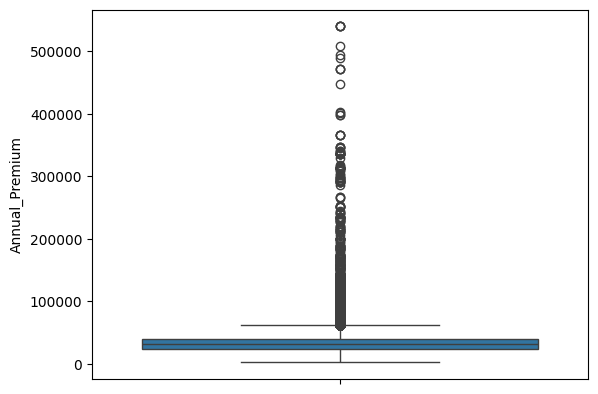

In [59]:
sns.boxplot(data["Annual_Premium"])
plt.show()

FIXING OUTLIER:

In [60]:
q1= data["Annual_Premium"].quantile(0.25)
q3= data["Annual_Premium"].quantile(0.75)
iqr= q3-q1
lower_fence= q1-1.5*iqr
upper_fence= q3+1.5*iqr

In [61]:
data=data[(data["Annual_Premium"]>lower_fence) & (data["Annual_Premium"]<upper_fence)]

<Axes: ylabel='Annual_Premium'>

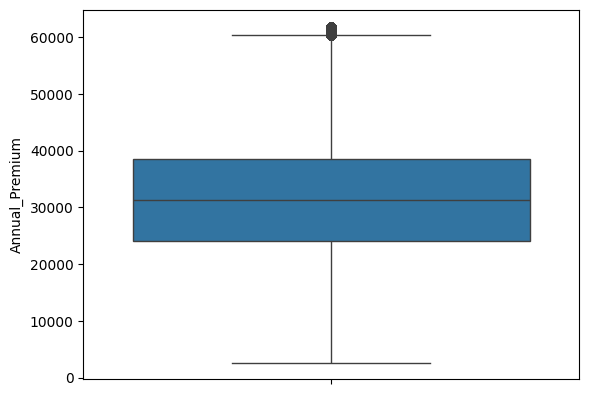

In [62]:
sns.boxplot(data["Annual_Premium"])

### **Data Visualization:-**
Utilize various visualization techniques to explore the distribution of key
variables.

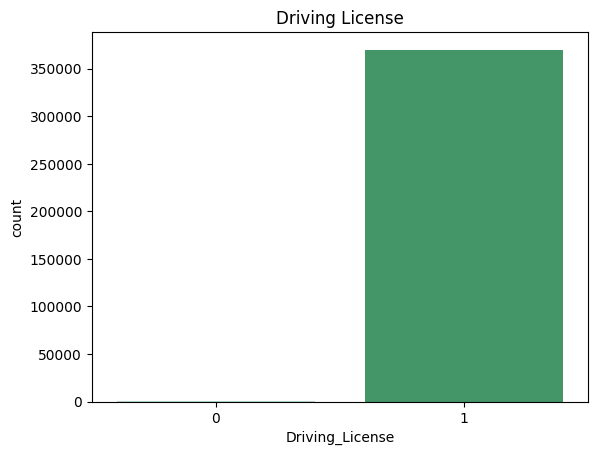

In [63]:
sns.countplot( data=data,x='Driving_License',palette="BuGn")
plt.title("Driving License")
plt.show()

In [64]:
data["Driving_License"].value_counts()

,count
Driving_License,
1,370026
0,763


**✅ Insight:**

* Most of the people have driving license.

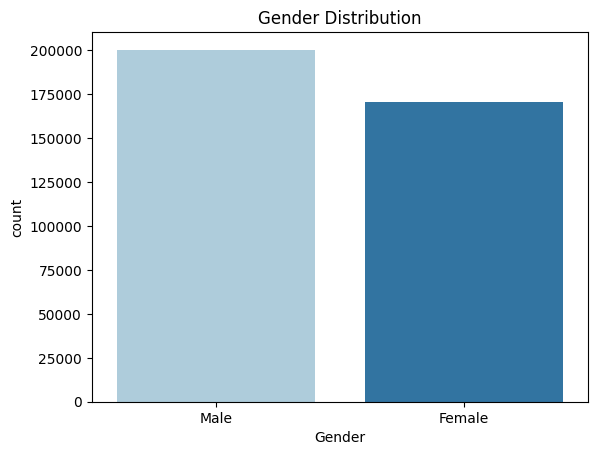

In [65]:
sns.countplot( data=data,x='Gender',palette="Paired")
plt.title("Gender Distribution")
plt.show()

**✅ Insight:**
* Slightly more males than females in the dataset

### **Feature Analysis:-**
Examine the relationship between features and the target variable (insurance
claims).


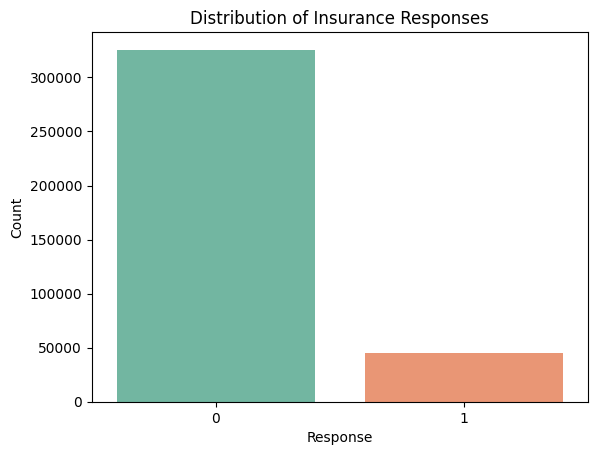

In [66]:
sns.countplot(x='Response', data=data,palette="Set2")
plt.title("Distribution of Insurance Responses")
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()

**✅ Insight:**

* Majority of customers are not interested in the insurance offer (Response = 0).

* Indicates low conversion rate, so better targeting or personalized policies may be needed

### **Age Distribution:**
Analyze the age distribution within the dataset and its impact on insurance
claims.

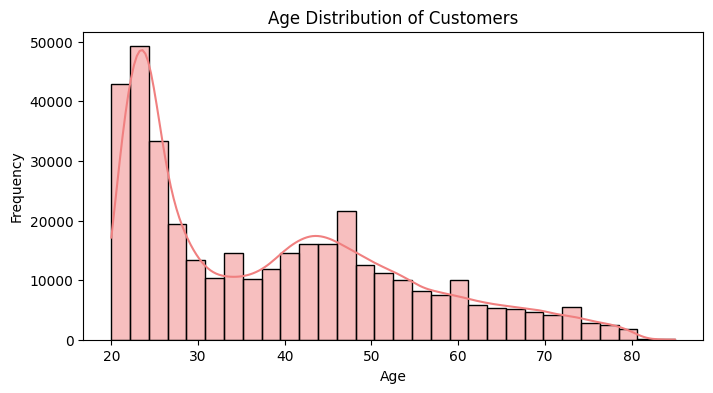

In [67]:
plt.figure(figsize=(8, 4))
sns.histplot(data['Age'], bins=30, kde=True,color="lightcoral")
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

**✅ Insight:**

* Most customers are between 20 to 40 years old.

* A marketing focus on the 30–50 age bracket may improve conversions, as they are more financially responsible and likely to buy insurance.

### **Premium Analysis:-**
Investigate the distribution of insurance premiums and their correlation with
claim frequencies.

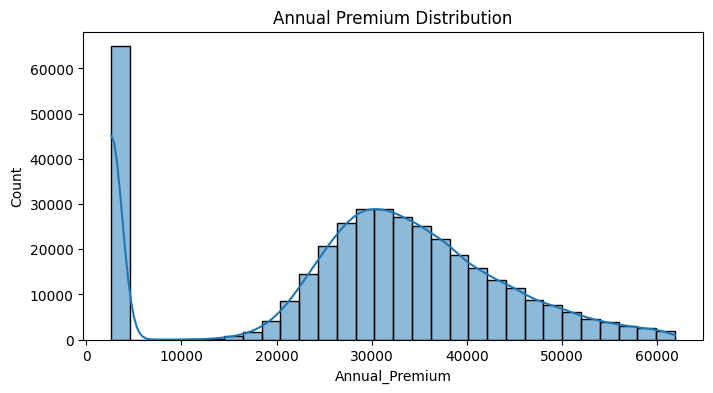

In [68]:
plt.figure(figsize=(8, 4))
sns.histplot(data['Annual_Premium'], bins=30, kde=True)
plt.title("Annual Premium Distribution")
plt.show()

✅ **Insights**:

* Skewed right with few high-value outliers.

* Median Premium: ₹30,000 approx.

* Actionable Insight: Ideal pricing band is below ₹60,000 for most customers.

### **Gender Analysis:-**
Investigate the role of gender in insurance claims.

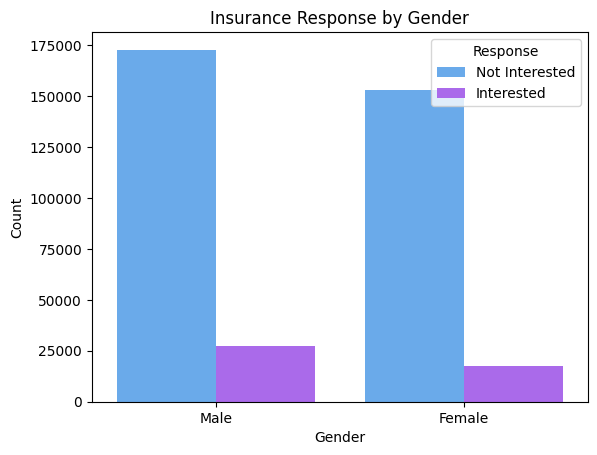

In [69]:
sns.countplot(x='Gender', hue='Response', data=data, palette="cool")
plt.title("Insurance Response by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Response", labels=["Not Interested", "Interested"])
plt.show()

**✅ Insight:**

* Males slightly outnumber females in the dataset.

* Both genders show interest in insurance, but males have a marginally higher conversion rate.

### **Vehicle Age and Claims:-**
Examine the impact of vehicle age on the likelihood of a claim.

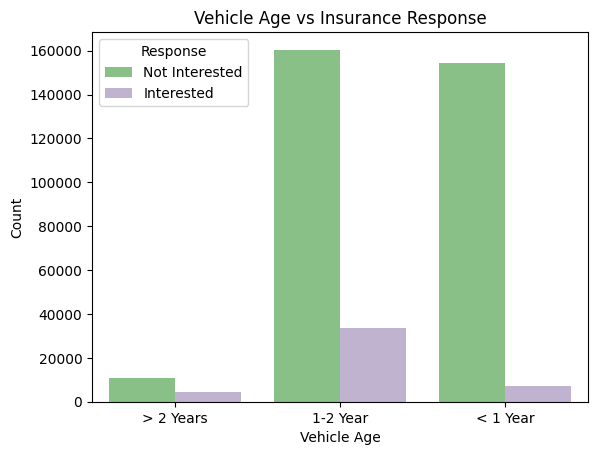

In [70]:
sns.countplot(x='Vehicle_Age', hue='Response', data=data, palette="Accent")
plt.title("Vehicle Age vs Insurance Response")
plt.xlabel("Vehicle Age")
plt.ylabel("Count")
plt.legend(title="Response", labels=["Not Interested", "Interested"])
plt.show()

**✅ Insight:**

* Customers with newer vehicles (<1 year) or 1–2 years are more likely to opt for insurance.

* Owners of older vehicles (>2 years) show lower interest — focus marketing on newer vehicle segments.

### **Region-wise Analysis:-**
Analyze regional patterns in insurance claims.

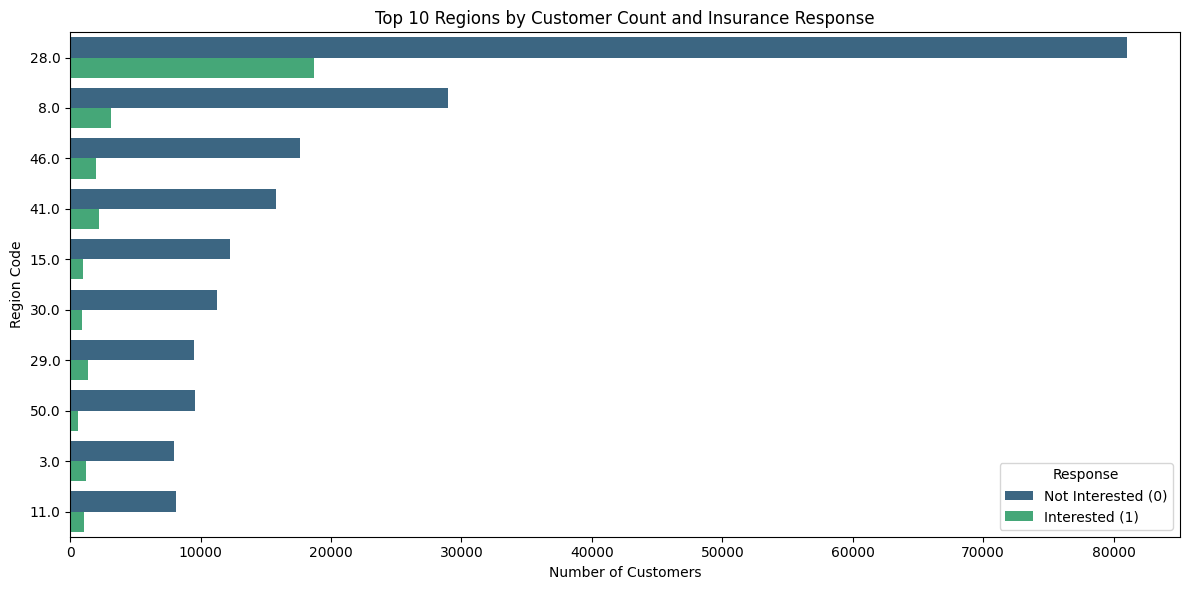

In [71]:
# Get top 10 regions by count
top_regions = data['Region_Code'].value_counts().nlargest(10).index

# Filter dataset to include only top 10 regions
df_top_regions = data[data['Region_Code'].isin(top_regions)]

# Plot response distribution for top 10 regions
plt.figure(figsize=(12, 6))
sns.countplot(y='Region_Code', hue='Response', data=df_top_regions,
              order=top_regions, palette="viridis")
plt.title("Top 10 Regions by Customer Count and Insurance Response")
plt.xlabel("Number of Customers")
plt.ylabel("Region Code")
plt.legend(title="Response", labels=["Not Interested (0)", "Interested (1)"])
plt.tight_layout()
plt.show()

**✅ Insight:**

Certain regions (like codes 28, 41, and 11) have high customer volume and higher positive responses.

These regions may represent prime markets for insurance promotions.

### **Policy Analysis:-**
Explore the distribution and impact of different insurance policy types.

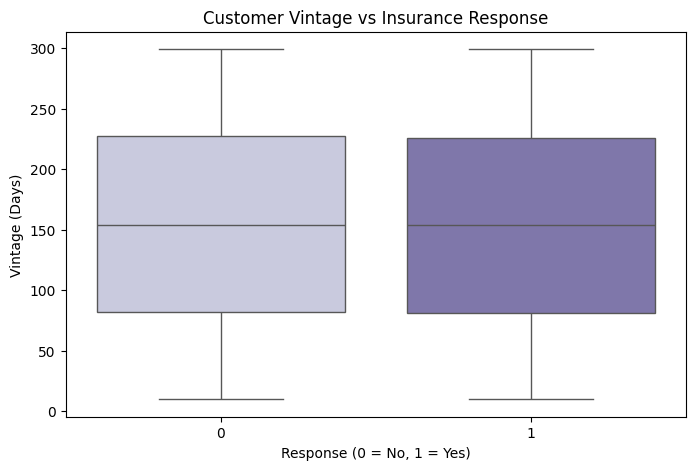

In [72]:
# Since no direct "number of policies" column exists, we can group by customer ID (if not unique) or Vintage
plt.figure(figsize=(8, 5))
sns.boxplot(x='Response', y='Vintage', data=data, palette="Purples")
plt.title("Customer Vintage vs Insurance Response")
plt.xlabel("Response (0 = No, 1 = Yes)")
plt.ylabel("Vintage (Days)")
plt.show()


**✅ Insight:**

* Customers with higher vintage (longer engagement with the company) show slightly more interest in buying insurance.

* Suggests that building trust over time increases conversion chances.

### **Claim Frequency by Vehicle Damage:**
Investigate the relationship between vehicle damage and claim frequencies.

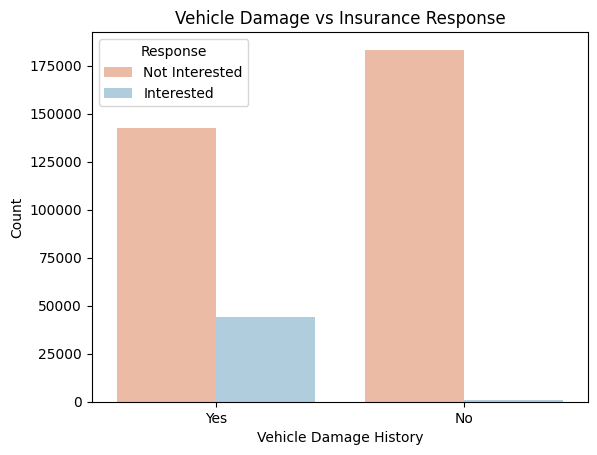

In [73]:
sns.countplot(x='Vehicle_Damage', hue='Response', data=data, palette="RdBu")
plt.title("Vehicle Damage vs Insurance Response")
plt.xlabel("Vehicle Damage History")
plt.ylabel("Count")
plt.legend(title="Response", labels=["Not Interested", "Interested"])
plt.show()


**✅ Insight:**

* Customers who reported vehicle damage in the past are significantly more likely to buy insurance.

* This is a key predictive feature and should be heavily weighted in risk models.

### **Customer Loyalty:**
Analyze if the number of policies held by a customer influences claim
likelihood.

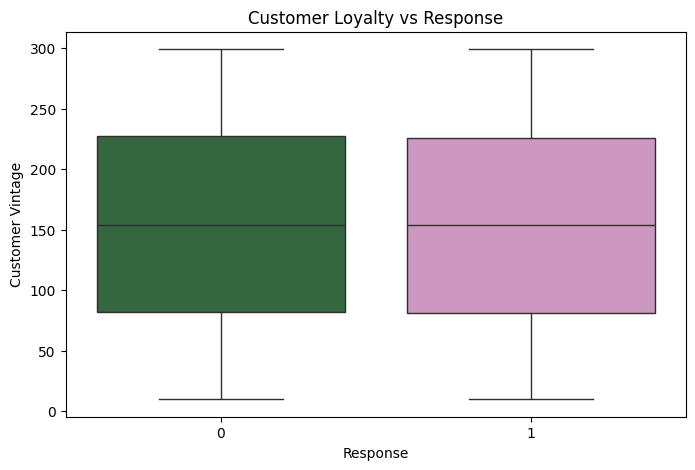

In [74]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Response', y='Vintage', data=data, palette="cubehelix")
plt.title("Customer Loyalty vs Response")
plt.xlabel("Response")
plt.ylabel("Customer Vintage")
plt.show()


**✅ Insight:**

* While loyalty varies widely, customers with longer association tend to show slightly higher interest.

* Long-term nurturing and regular engagement may lead to better insurance uptake.

### **🔍 Pairplot for Numeric Relationships:**
Pairplot helps to visually inspect pairwise relationships and class separability based on the target variable (Response). We'll use a sample due to large data size.


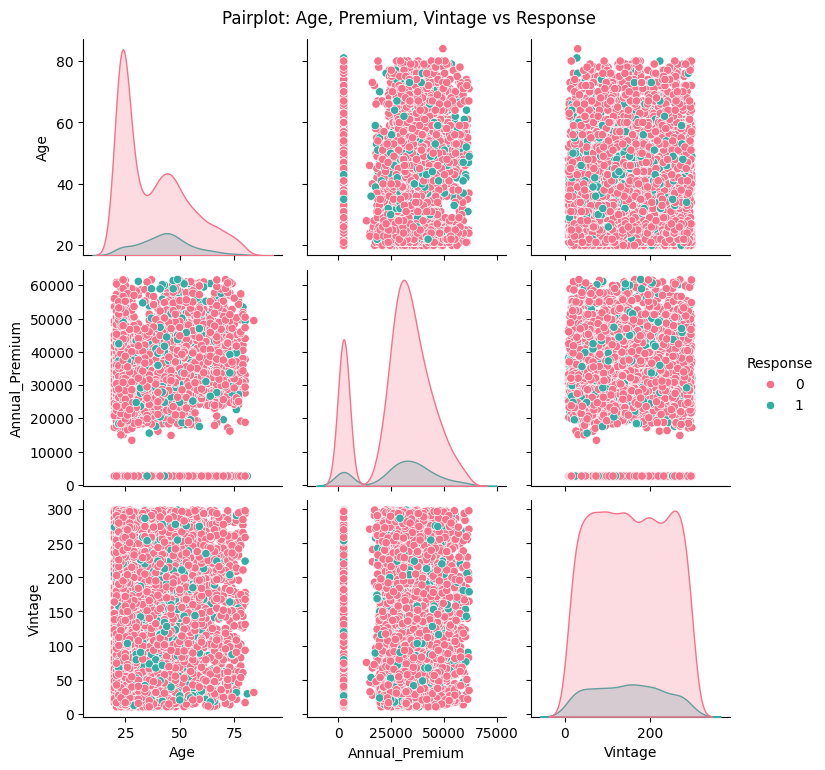

In [75]:
sample_df = data.sample(5000, random_state=42)
sns.pairplot(sample_df, hue='Response', vars=['Age', 'Annual_Premium', 'Vintage'], palette='husl')
plt.suptitle("Pairplot: Age, Premium, Vintage vs Response", y=1.02)
plt.show()

✅ **Insight**:
- Customers interested in insurance (Response = 1) tend to have a slightly lower premium and are more concentrated between ages 30–50.
- No major linear separation seen, but some clustering by vintage is noticeable.


### **📊 Correlation Heatmap:**

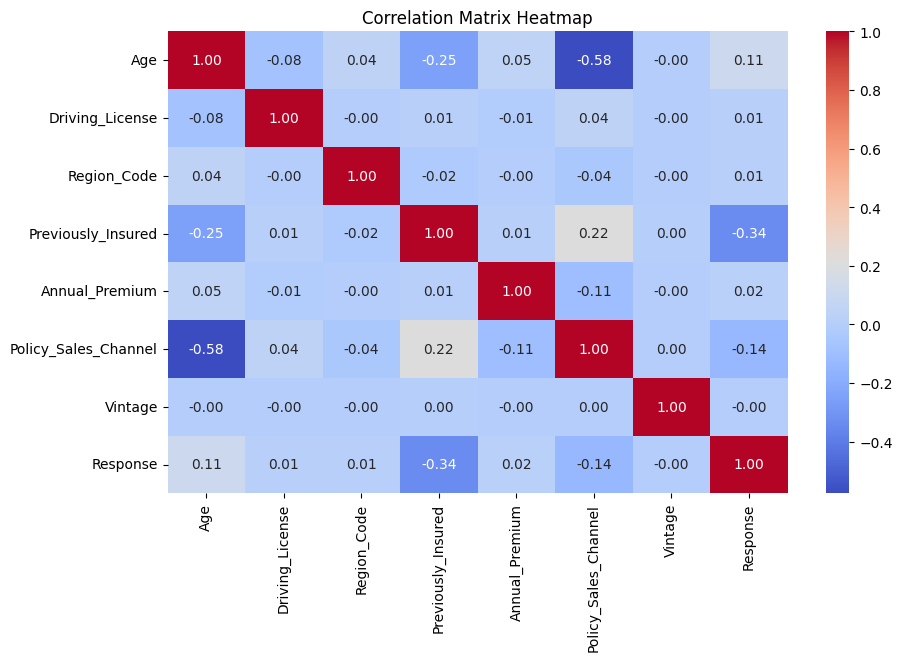

In [76]:
plt.figure(figsize=(10, 6))
corr_matrix = data.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

✅ **Correlation Insights**:
- Most features are weakly correlated with each other.
- Driving_License and Response have negligible correlation — reinforcing that it's not a useful predictor.
- Previously_Insured and Response show a negative correlation — those not insured before are more likely to buy now.


### **🎯 Scatterplot: Annual Premium vs Age:**

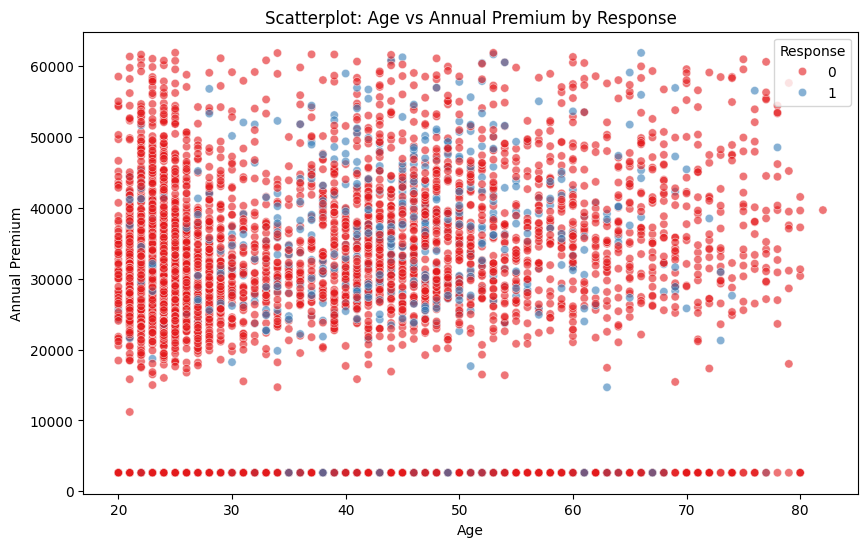

In [77]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data.sample(5000), x='Age', y='Annual_Premium', hue='Response', alpha=0.6, palette='Set1')
plt.title("Scatterplot: Age vs Annual Premium by Response")
plt.xlabel("Age")
plt.ylabel("Annual Premium")
plt.show()

✅ **Insight**:
- No obvious linear relationship between age and premium.
- Customers across all ages are paying similar premiums, but those in mid-age groups (30–50) show higher insurance interest.


### **🧮 Top 10 Policy Sales Channels by Customer Count:**


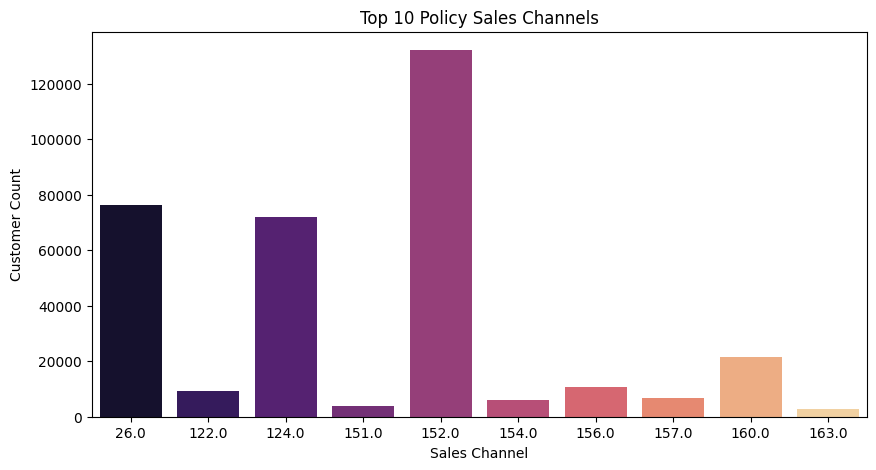

In [78]:
top_channels = data['Policy_Sales_Channel'].value_counts().nlargest(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_channels.index, y=top_channels.values, palette="magma")
plt.title("Top 10 Policy Sales Channels")
plt.xlabel("Sales Channel")
plt.ylabel("Customer Count")
plt.show()

✅ **Insight**:
- A few sales channels dominate the customer base — indicating reliance on specific marketing or partner pipelines.
- Useful for business to either optimize or diversify acquisition channels.


### **Conclusion💡:**
The Exploratory Data Analysis on the vehicle insurance dataset successfully revealed actionable insights into customer behavior and purchasing patterns. Here's a summary of the findings:

📌**1. Customer Demographics:**

* Majority of customers are aged between 20–40, with 30–50 showing the highest interest in insurance.

* Males slightly outnumber females and have a marginally higher response rate.

📌**2. Vehicle & Claim Insights:**

* Newer vehicles and those with a history of damage are more likely to be insured.

* Customers without prior insurance are more interested in purchasing now, highlighting untapped segments.

📌**3. Region-Wise Behavior:**

* Certain regions (codes 28, 41, 11) show significantly higher positive responses, making them ideal for targeted marketing.

📌**4. Premium Analysis:**

* Premiums are skewed toward ₹20,000–₹50,000.

* Higher premiums don’t always correlate with greater interest in insurance, suggesting room to optimize policy pricing.

📌**5. Customer Loyalty:**

* Vintage (days associated with company) shows that longer-term customers have a slightly higher interest in buying insurance.

### **🏁 Final Remarks:**
This project demonstrates how simple EDA can lead to powerful business insights and model-ready datasets. With minimal engineering, it’s possible to:

* Guide targeted marketing campaigns based on regional and vehicle history trends.

* Use customer profile segmentation to improve conversion rates.

* Build classification models to predict purchase intent.

**✅ This analysis shows how data-driven decisions can significantly improve customer outreach and profitability in the vehicle insurance sector.**